Задание №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import cauchy, norm
from collections import defaultdict

In [2]:
def generate_uniform_sample(N, a, b):
    return np.random.uniform(a, b, N)

def generate_sum_of_uniform_sample(N, a, b, count):
    return np.sum(np.random.uniform(a, b, (count, N)), axis=0)

def generate_normal_sample(N):
    return np.random.normal(0, 1, N)

def generate_cauchy_sample(N):
    return np.random.standard_cauchy(N)

In [3]:
def compute_exact_confidence_interval(data, alpha=0.05):
    sample_size = len(data)
    sorted_data = np.sort(data)
    lower_idx = int(np.floor(sample_size * alpha / 2))
    upper_idx = int(np.ceil(sample_size * (1 - alpha / 2))) - 1 
    return sorted_data[lower_idx], sorted_data[upper_idx]

# Function to compute approximate confidence interval
def compute_approx_confidence_interval(median, std_dev, sample_size, alpha=0.05):
    z_score = norm.ppf(1 - alpha/2)
    margin_error = z_score * std_dev / np.sqrt(sample_size)
    return median - margin_error, median + margin_error

# Function to run experiments based on distribution type
def perform_simulation(sample_size, a, b, count, distribution_type):
    median_values = []
    for _ in range(10000):
        if distribution_type == 'uniform':
            sample = generate_uniform_sample(sample_size, a, b)
        elif distribution_type == 'sum_uniform':
            sample = generate_sum_of_uniform_sample(sample_size, a, b, count)
        elif distribution_type == 'normal':
            sample = generate_normal_sample(sample_size)
        elif distribution_type == 'cauchy':
            sample = generate_cauchy_sample(sample_size)
        
        median = np.median(sample)
        median_values.append(median)
    
    return np.median(median_values), np.std(median_values), median_values


In [4]:
def compute_clopper_pearson_interval(probability, total_samples, alpha=0.05):
    z_score = norm.ppf(1 - alpha / 2)

    lower_bound = probability - z_score * np.sqrt(probability * (1 - probability) / total_samples)
    upper_bound = probability + z_score * np.sqrt(probability * (1 - probability) / total_samples)

    lower_bound = max(0, lower_bound)
    upper_bound = min(1, upper_bound)
    
    return lower_bound, upper_bound

def plot_confidence_intervals(sample_sizes, exact_probs, approx_probs, exact_cis, approx_cis):
    exact_lower = [ci[0] for ci in exact_cis]
    exact_upper = [ci[1] for ci in exact_cis]
    approx_lower = [ci[0] for ci in approx_cis]
    approx_upper = [ci[1] for ci in approx_cis]

    plt.figure(figsize=(10, 6))
    plt.errorbar(sample_sizes, exact_probs, 
                 yerr=[np.array(exact_probs) - np.array(exact_lower),
                       np.array(exact_upper) - np.array(exact_probs)],
                 fmt='o', label='Exact Probabilities', color='blue', capsize=5)

    plt.errorbar(sample_sizes, approx_probs, 
                 yerr=[np.array(approx_probs) - np.array(approx_lower),
                       np.array(approx_upper) - np.array(approx_probs)],
                 fmt='o', label='Approximate Probabilities', color='orange', capsize=5)

    plt.xticks(sample_sizes)
    plt.xlabel('Sample Size (N)')
    plt.ylabel('Probabilities')
    plt.title('Confidence Intervals for Probabilities')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Uniform Distribution
N = 10, Median: 0.5010675844413948, Exact Interval: (0.23651386961370757, 0.7646872658634136), Approximation: (0.41546476969182833, 0.5866703991909612), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.44
N = 100, Median: 0.49985048270063154, Exact Interval: (0.40393813733396783, 0.597702948499403), Approximation: (0.49017874659179805, 0.509522218809465), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.16
N = 1000, Median: 0.49988397416055524, Exact Interval: (0.46922552076087676, 0.5310822942032181), Approximation: (0.49890932237837077, 0.5008586259427397), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.05


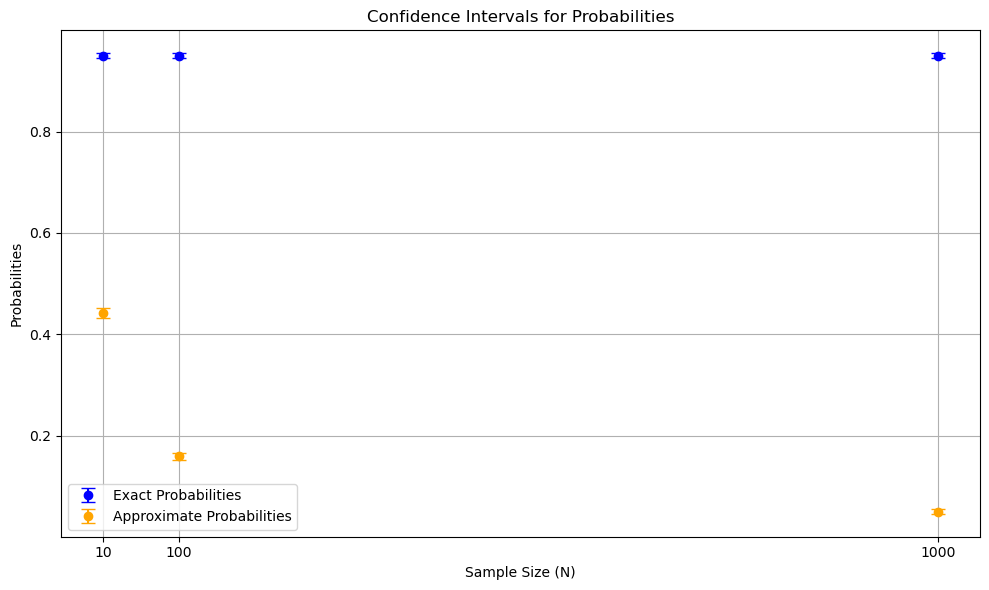

In [5]:
sample_sizes = [10, 100, 1000]

exact_probabilities = []
approx_probabilities = []
exact_confidence_intervals = []
approx_confidence_intervals = []


print("Uniform Distribution")
for N in sample_sizes:
    median, std_dev, medians = perform_simulation(N, 0, 1, 2, 'uniform')

    exact_interval = compute_exact_confidence_interval(medians)
    exact_hits = sum(1 for m in medians if exact_interval[0] <= m <= exact_interval[1])
    exact_probability = exact_hits / len(medians)

    approx_interval = compute_approx_confidence_interval(median, std_dev, N)
    approx_hits = sum(1 for m in medians if approx_interval[0] <= m <= approx_interval[1])
    approx_probability = approx_hits / len(medians)

    print(f"N = {N}, Median: {median}, Exact Interval: {exact_interval}, "
          f"Approximation: {approx_interval}, Exact Confidence Probability: {exact_probability:.2f}, "
          f"Approx Confidence Probability: {approx_probability:.2f}")

    exact_ci = compute_clopper_pearson_interval(exact_probability, len(medians))
    approx_ci = compute_clopper_pearson_interval(approx_probability, len(medians))

    exact_probabilities.append(exact_probability)
    approx_probabilities.append(approx_probability)
    exact_confidence_intervals.append(exact_ci)
    approx_confidence_intervals.append(approx_ci)

plot_confidence_intervals(sample_sizes, exact_probabilities, approx_probabilities, exact_confidence_intervals, approx_confidence_intervals)

Sum of Uniform Distributions
N = 10, Median: 1.001530477206469, Exact Interval: (0.6802013423429751, 1.3257040770010298), Approximation: (0.9009044036419019, 1.1021565507710362), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.49
N = 100, Median: 0.9998942247308351, Exact Interval: (0.8991327425502934, 1.1020233700209299), Approximation: (0.9897930179723101, 1.0099954314893602), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.16
N = 1000, Median: 0.9999989699469343, Exact Interval: (0.9687858347988716, 1.0315720952927667), Approximation: (0.9990150306661589, 1.0009829092277096), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.05


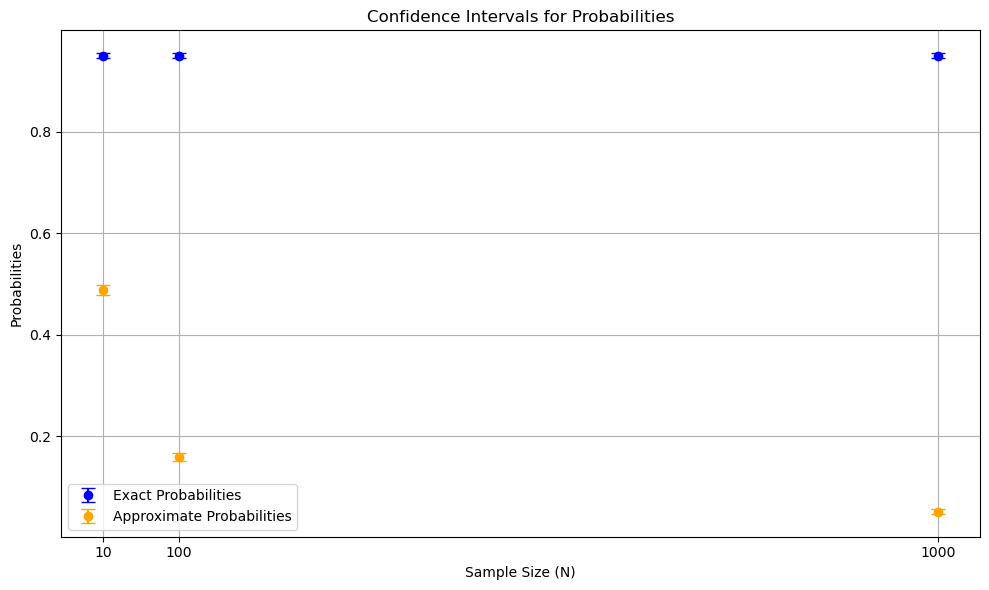

In [6]:
exact_probabilities = []
approx_probabilities = []
exact_confidence_intervals = []
approx_confidence_intervals = []

print("Sum of Uniform Distributions")
for N in sample_sizes:
    median, std_dev, medians = perform_simulation(N, 0, 1, 2, 'sum_uniform')

    exact_interval = compute_exact_confidence_interval(medians)
    exact_hits = sum(1 for m in medians if exact_interval[0] <= m <= exact_interval[1])
    exact_probability = exact_hits / len(medians)

    approx_interval = compute_approx_confidence_interval(median, std_dev, N)
    approx_hits = sum(1 for m in medians if approx_interval[0] <= m <= approx_interval[1])
    approx_probability = approx_hits / len(medians)

    print(f"N = {N}, Median: {median}, Exact Interval: {exact_interval}, "
          f"Approximation: {approx_interval}, Exact Confidence Probability: {exact_probability:.2f}, "
          f"Approx Confidence Probability: {approx_probability:.2f}")

    exact_ci = compute_clopper_pearson_interval(exact_probability, len(medians))
    approx_ci = compute_clopper_pearson_interval(approx_probability, len(medians))

    exact_probabilities.append(exact_probability)
    approx_probabilities.append(approx_probability)
    exact_confidence_intervals.append(exact_ci)
    approx_confidence_intervals.append(approx_ci)

plot_confidence_intervals(sample_sizes, exact_probabilities, approx_probabilities, exact_confidence_intervals, approx_confidence_intervals)


Normal Distribution
N = 10, Median: 0.0008743580661959415, Exact Interval: (-0.7279590605757162, 0.7049278041121946), Approximation: (-0.22754851709036306, 0.22929723322275491), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.46
N = 100, Median: 0.0007045155934138201, Exact Interval: (-0.2450318666265135, 0.24277005619533548), Approximation: (-0.023558030198038333, 0.024967061384865975), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.15
N = 1000, Median: 0.0006006653528315565, Exact Interval: (-0.07922456690640599, 0.07826866048768333), Approximation: (-0.0018775197356034718, 0.003078850441266585), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.05


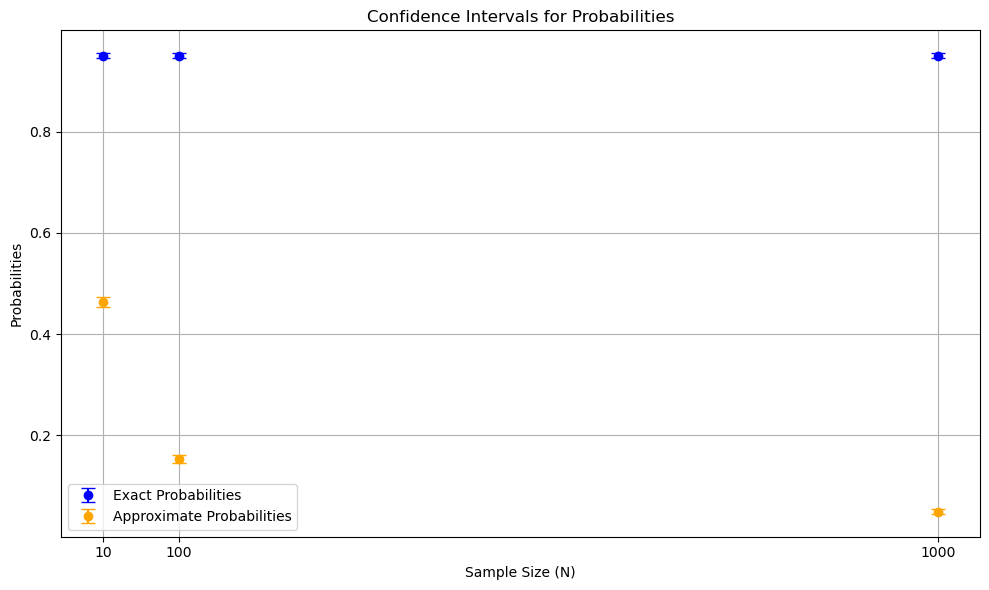

In [7]:
exact_probabilities = []
approx_probabilities = []
exact_confidence_intervals = []
approx_confidence_intervals = []

print("\nNormal Distribution")
for N in sample_sizes:
    median, std_dev, medians = perform_simulation(N, 0, 1, 0, 'normal')

    exact_interval = compute_exact_confidence_interval(medians)
    exact_hits = sum(1 for m in medians if exact_interval[0] <= m <= exact_interval[1])
    exact_probability = exact_hits / len(medians)

    approx_interval = compute_approx_confidence_interval(median, std_dev, N)
    approx_hits = sum(1 for m in medians if approx_interval[0] <= m <= approx_interval[1])
    approx_probability = approx_hits / len(medians)

    print(f"N = {N}, Median: {median}, Exact Interval: {exact_interval}, "
          f"Approximation: {approx_interval}, Exact Confidence Probability: {exact_probability:.2f}, "
          f"Approx Confidence Probability: {approx_probability:.2f}")

    exact_ci = compute_clopper_pearson_interval(exact_probability, len(medians))
    approx_ci = compute_clopper_pearson_interval(approx_probability, len(medians))

    exact_probabilities.append(exact_probability)
    approx_probabilities.append(approx_probability)
    exact_confidence_intervals.append(exact_ci)
    approx_confidence_intervals.append(approx_ci)

plot_confidence_intervals(sample_sizes, exact_probabilities, approx_probabilities, exact_confidence_intervals, approx_confidence_intervals)



Cauchy Distribution
N = 10, Median: -0.0007721534913105871, Exact Interval: (-1.1557095587806825, 1.1598486012612068), Approximation: (-0.357330911045627, 0.3557866040630058), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.53
N = 100, Median: -0.0003993505294824873, Exact Interval: (-0.3046123174337395, 0.30803865417395604), Approximation: (-0.031215739501615925, 0.030417038442650948), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.15
N = 1000, Median: 0.0003445742370566987, Exact Interval: (-0.09579490970956922, 0.09796220550569523), Approximation: (-0.002720378078727815, 0.0034095265528412124), Exact Confidence Probability: 0.95, Approx Confidence Probability: 0.05


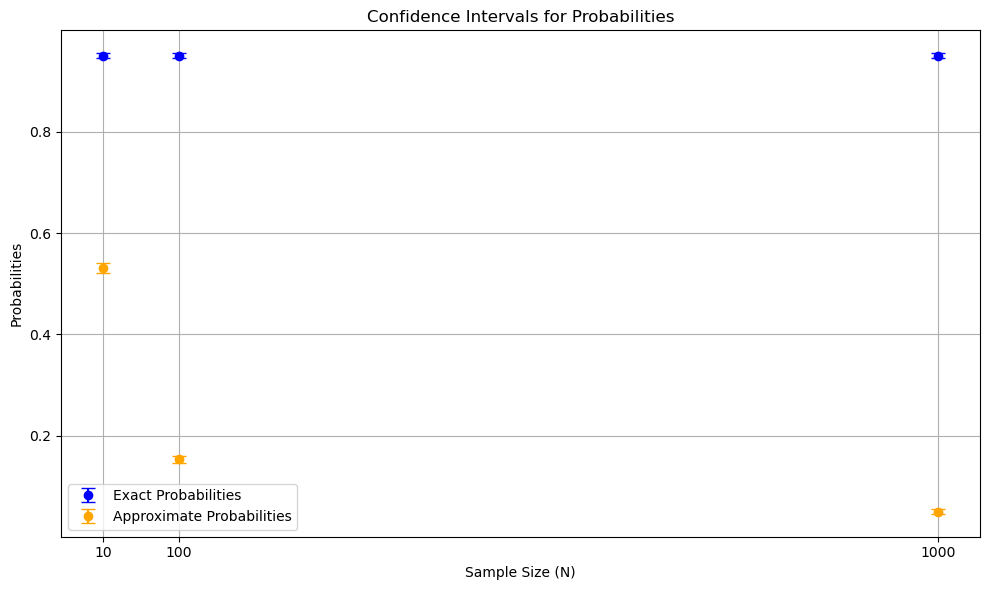

In [8]:
exact_probabilities = []
approx_probabilities = []
exact_confidence_intervals = []
approx_confidence_intervals = []

print("\nCauchy Distribution")
for N in sample_sizes:
    median, std_dev, medians = perform_simulation(N, 0, 1, 0, 'cauchy') 

    exact_interval = compute_exact_confidence_interval(medians)
    exact_hits = sum(1 for m in medians if exact_interval[0] <= m <= exact_interval[1])
    exact_probability = exact_hits / len(medians)

    approx_interval = compute_approx_confidence_interval(median, std_dev, N)
    approx_hits = sum(1 for m in medians if approx_interval[0] <= m <= approx_interval[1])
    approx_probability = approx_hits / len(medians)

    print(f"N = {N}, Median: {median}, Exact Interval: {exact_interval}, "
          f"Approximation: {approx_interval}, Exact Confidence Probability: {exact_probability:.2f}, "
          f"Approx Confidence Probability: {approx_probability:.2f}")

    exact_ci = compute_clopper_pearson_interval(exact_probability, len(medians))
    approx_ci = compute_clopper_pearson_interval(approx_probability, len(medians))

    exact_probabilities.append(exact_probability)
    approx_probabilities.append(approx_probability)
    exact_confidence_intervals.append(exact_ci)
    approx_confidence_intervals.append(approx_ci)

plot_confidence_intervals(sample_sizes, exact_probabilities, approx_probabilities, exact_confidence_intervals, approx_confidence_intervals)


Задание №2

In [9]:
def quantile_confidence_intervals(sample_data, alpha=0.05):
    quantile_1 = np.quantile(sample_data, 0.01)
    quantile_99 = np.quantile(sample_data, 0.99)
    
    sample_size = len(sample_data)
    std_error_q1 = np.std(sample_data) / np.sqrt(sample_size)
    std_error_q99 = np.std(sample_data) / np.sqrt(sample_size)
    
    ci_q1 = (quantile_1 - 1.96 * std_error_q1, quantile_1 + 1.96 * std_error_q1)
    ci_q99 = (quantile_99 - 1.96 * std_error_q99, quantile_99 + 1.96 * std_error_q99)
    
    return ci_q1, ci_q99

def check_boundary_inclusion(ci_q1, ci_q99, min_value, max_value):
    is_q1_above_min = ci_q1[0] > min_value
    is_q99_below_max = ci_q99[1] < max_value
    return is_q1_above_min, is_q99_below_max

In [12]:
sample_sizes = [10, 100, 1000, 10000]
distribution_generators = {
    "Uniform": generate_uniform_sample,
    "Sum of Uniforms": generate_sum_of_uniform_sample,
    "Normal": generate_normal_sample,
    "Cauchy": generate_cauchy_sample
}

for dist_name, generator in distribution_generators.items():
    print(f"\n{dist_name} distribution")
    boundary_exclusions = []

    for N in sample_sizes:

            sample_data = generator(N, 0, 1, 2)

        ci_q1, ci_q99 = quantile_confidence_intervals(sample_data)

        # Get min and max values of the sample
        min_value = np.min(sample_data)
        max_value = np.max(sample_data)

        # Check if quantile intervals exclude the min and max values
        is_q1_excluded, is_q99_excluded = check_boundary_inclusion(ci_q1, ci_q99, min_value, max_value)

        boundary_exclusions.append((N, is_q1_excluded, is_q99_excluded))

        # Print results
        print(f"Sample size N={N}: CI(0.01)={ci_q1}, CI(0.99)={ci_q99}, "
              f"Excludes X_(1): {not is_q1_excluded}, Excludes X_(n): {not is_q99_excluded}")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    x_values = [item[0] for item in boundary_exclusions]
    q1_exclusions = [item[1] for item in boundary_exclusions]
    q99_exclusions = [item[2] for item in boundary_exclusions]

    plt.plot(x_values, q1_exclusions, marker='o', label="X_(1) excluded", linestyle='--')
    plt.plot(x_values, q99_exclusions, marker='o', label="X_(n) excluded", linestyle='-')

    plt.xticks(sample_sizes)
    plt.xlabel('Sample size (N)')
    plt.ylabel('Boundary exclusion status')
    plt.title(f'Boundary Exclusion of Confidence Intervals for {dist_name} Distribution')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()



Uniform distribution


TypeError: generate_uniform_sample() takes 3 positional arguments but 4 were given

Задание №3

In [ ]:
def mad(data):
    return np.mean(np.abs(data - np.mean(data)))

def bootstrap_mad(data, num_bootstrap=1000):
    bootstraps = [mad(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)]
    lower = np.percentile(bootstraps, 2.5)
    upper = np.percentile(bootstraps, 97.5)
    
    return lower, upper

In [ ]:
sample_sizes = [10, 100, 1000]

distributions = {
    "Uniform": generate_uniform_sample,
    "Sum of Uniforms": generate_sum_of_uniform_sample,
    "Normal": generate_normal_sample,
    "Cauchy": generate_cauchy_sample
}

for distribution_name, generator in distributions.items():
    mad_values = []
    lower_bounds = []
    upper_bounds = []
    
    # Loop through different sample sizes
    for sample_size in sample_sizes:
        if distribution_name == "Sum of Uniforms":
            # For the sum of uniform distributions, pass an additional argument
            sample_data = generator(sample_size, 0, 1, 2)
 
        
        # Calculate MAD and bootstrap confidence intervals
        mad_value = mad(sample_data)
        lower_ci, upper_ci = bootstrap_mad(sample_data)
        
        # Store MAD values and confidence intervals
        mad_values.append(mad_value)
        lower_bounds.append(lower_ci)
        upper_bounds.append(upper_ci)

    # Plot MAD and confidence intervals for each distribution
    plt.figure(figsize=(10, 6))
    
    # Create an error bar plot to visualize the confidence intervals
    plt.errorbar(sample_sizes, mad_values, 
                 yerr=[np.array(mad_values) - np.array(lower_bounds),
                       np.array(upper_bounds) - np.array(mad_values)],
                 fmt='o', label=distribution_name, capsize=5)

    plt.xticks(sample_sizes)
    plt.xlabel('Sample Size (N)')
    plt.ylabel('MAD and Confidence Intervals')
    plt.title(f'Bootstrap Confidence Intervals for MAD: {distribution_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
